In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000328_08_03_180.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000223_09_02_146.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000229_03_04_202.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000103_01_01_104.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000103_12_01_075.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000143_04_02_153.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/002276_05_03_078.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000020_03_01_166.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000054_03_01_025.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000230_04_01_242.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000058_07_01_170.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000058_07_01_195.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000230_03_02_166.png
/kaggle/inpu

In [21]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix

Folder paths

In [22]:
Datatset_dir = "/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset"
category_dir = {0: "Bengin cases", 1: "Malignant cases",2:"Normal cases"}
out_dir = '/kaggle/working'

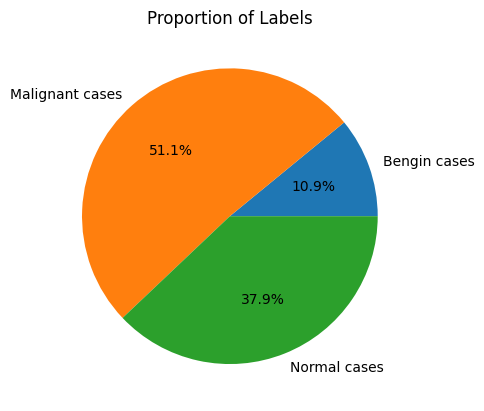

In [23]:
import matplotlib.pyplot as plt

# Sample data
category_dir= ["Bengin cases", "Malignant cases", "Normal cases"]
sizes = [ 120,561,416 ] 

# Create a pie chart
plt.pie(sizes,labels=category_dir, autopct='%1.1f%%')
plt.title("Proportion of Labels")
plt.show()

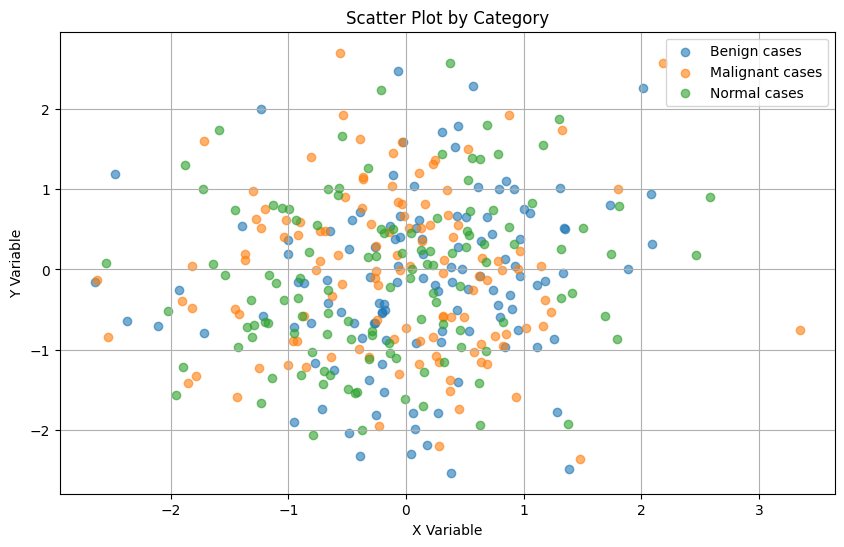

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data representing two continuous variables for each category
category_dir = ["Benign cases", "Malignant cases", "Normal cases"]

# Generate sample data for the scatter plots
data_points = {}
for category in category_dir:
    # Generate random data points for each category
    num_points = 50  # Number of data points for each category
    x_data = np.random.randn(120)  # Replace with your actual data
    y_data = np.random.randn(120)  # Replace with your actual data
    data_points[category] = (x_data, y_data)

# Create scatter plots for each category
plt.figure(figsize=(10, 6))

for category, (x_data, y_data) in data_points.items():
    plt.scatter(x_data, y_data, label=category, alpha=0.6)

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.title("Scatter Plot by Category")
plt.legend()
plt.grid(True)

plt.show()


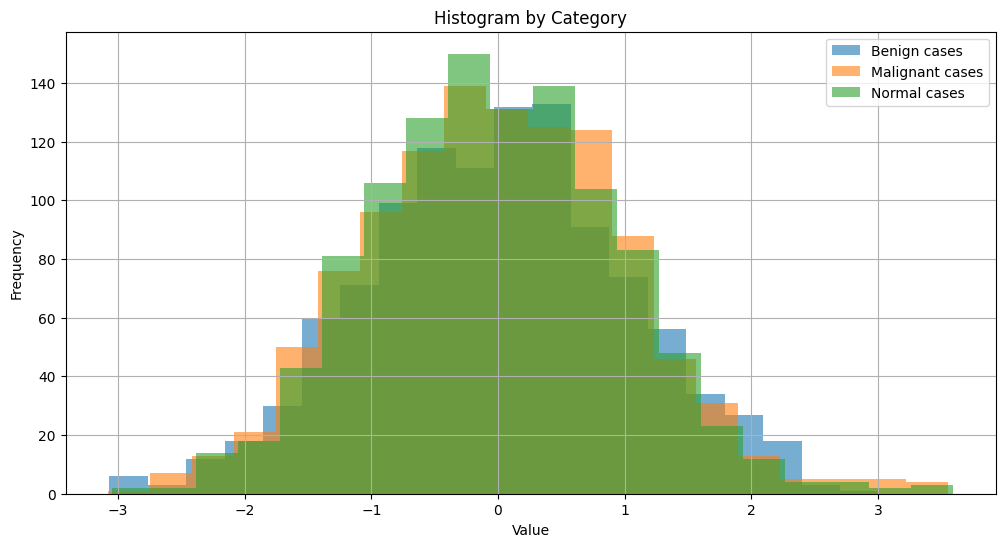

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data representing a continuous variable for each category
category_dir = ["Benign cases", "Malignant cases", "Normal cases"]

# Generate sample data for the histograms
data_points = {}
num_bins = 20  # Number of bins in the histogram

for category in category_dir:
    # Generate random data points for each category (replace with your actual data)
    data = np.random.randn(1097)  # Replace with your actual data
    data_points[category] = data

# Create histograms for each category
plt.figure(figsize=(12, 6))

for category, data in data_points.items():
    plt.hist(data, bins=num_bins, alpha=0.6, label=category)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram by Category")
plt.legend()
plt.grid(True)

plt.show()


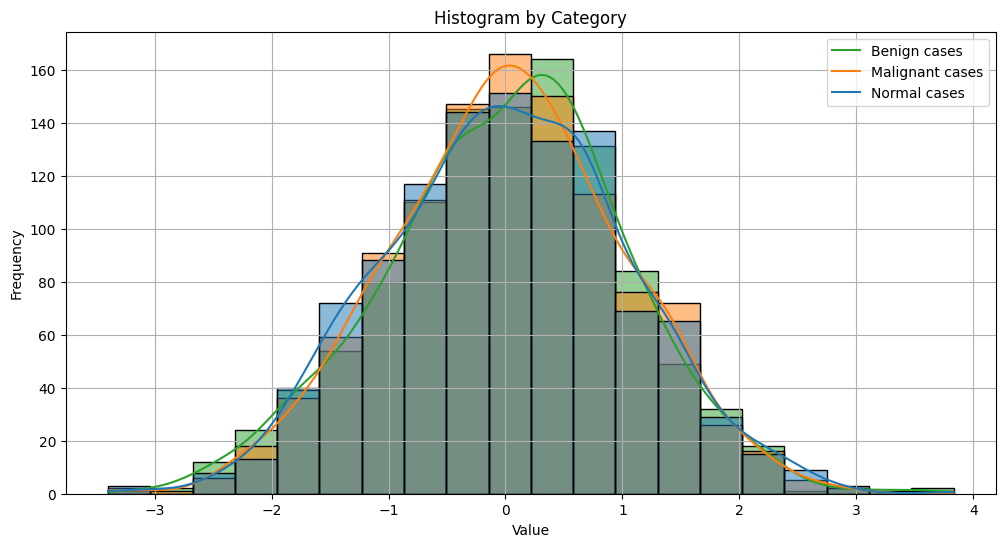

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data representing a continuous variable for each category
category_dir = ["Benign cases", "Malignant cases", "Normal cases"]

# Generate sample data for the histograms
data_points = {}
num_bins = 20  # Number of bins in the histogram

for category in category_dir:
    # Generate random data points for each category (replace with your actual data)
    data = np.random.randn(1097)  # Replace with your actual data
    data_points[category] = data

# Create a Pandas DataFrame from the data
df = pd.DataFrame(data_points)

# Create histograms for each category using Seaborn
plt.figure(figsize=(12, 6))
sns.histplot(data=df, bins=num_bins, kde=True)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram by Category")
plt.legend(category_dir)
plt.grid(True)

plt.show()


In [ ]:
batch_size = 32
image_size = (224, 224)
epochs = 10
learning_rate = 0.001


In [ ]:
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2 )

In [46]:
Dataset_dir = "/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset"
train_generator = datagen.flow_from_directory(
    Dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    subset='training'     # Use the training subset
)

Found 878 images belonging to 3 classes.


In [47]:
Datatset_dir = "/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset"
validation_generator = datagen.flow_from_directory(
    Dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    subset='validation'   # Use the validation subset
)

Found 219 images belonging to 3 classes.


In [45]:
# Build the Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

model = Model(inputs=base_model.input, outputs=predictions)


In [70]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define the number of classes/categories
num_classes = len(category_dir)

# Load the pre-trained ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the custom model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_9[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [44]:
# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
# Train the Model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


Epoch 1/10
28/28 [==============================] - 89s 425ms/step - loss: -82.4549 - accuracy: 0.5011 - val_loss: -151.7539 - val_accuracy: 0.5114
Epoch 2/10
28/28 [==============================] - 5s 184ms/step - loss: -450.3490 - accuracy: 0.5114 - val_loss: -148.6294 - val_accuracy: 0.5114
Epoch 3/10
28/28 [==============================] - 5s 188ms/step - loss: -1062.4462 - accuracy: 0.5114 - val_loss: -569.9423 - val_accuracy: 0.5114
Epoch 4/10
28/28 [==============================] - 6s 207ms/step - loss: -2122.6970 - accuracy: 0.5114 - val_loss: -10.4538 - val_accuracy: 0.5114
Epoch 5/10
28/28 [==============================] - 5s 184ms/step - loss: -3564.1941 - accuracy: 0.5114 - val_loss: -22.7341 - val_accuracy: 0.5114
Epoch 6/10
28/28 [==============================] - 5s 183ms/step - loss: -5349.2212 - accuracy: 0.5114 - val_loss: 154.3445 - val_accuracy: 0.5114
Epoch 7/10
28/28 [==============================] - 5s 186ms/step - loss: -7720.1392 - accuracy: 0.5114 - val_l

In [38]:
# Evaluate the Model
Dataset_dir = '/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'
test_generator = datagen.flow_from_directory(
    Dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    subset='validation'   # Use the validation subset for evaluation
)

test_loss, test_accuracy = model.evaluate(test_generator)


Found 219 images belonging to 3 classes.
7/7 [==============================] - 1s 134ms/step - loss: -767.1592 - accuracy: 0.5114


In [39]:
# Make Predictions
predictions = model.predict(test_generator)
# Apply a threshold of 0.5 for binary classification
predicted_labels = (predictions > 0.5).astype(int)  

7/7 [==============================] - 2s 131ms/step


In [57]:
# Calculate and print classification metrics
true_labels = test_generator.classes
class_names = category_dir  # Use the category_dir list as class names

classification_rep = classification_report(true_labels, predicted_labels, target_names=class_names, zero_division=0)
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Print classification metrics and confusion matrix
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)



Classification Report:
                  precision    recall  f1-score   support

   Benign cases       0.12      0.04      0.06        24
Malignant cases       0.51      0.96      0.66       112
   Normal cases       0.00      0.00      0.00        83

       accuracy                           0.49       219
      macro avg       0.21      0.33      0.24       219
   weighted avg       0.27      0.49      0.35       219


Confusion Matrix:
 [[  1  23   0]
 [  5 107   0]
 [  2  81   0]]
